# Unit 5 - Financial Planning

In [60]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [61]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [62]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2
my_eth = 5.3

In [63]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [64]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response_data = requests.get(btc_url).json()
print(json.dumps(btc_response_data, indent=4))

# Fetch current ETH price
# YOUR CODE HERE!
eth_response_data = requests.get(eth_url).json()
print(json.dumps(eth_response_data, indent=4))


# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * (btc_response_data['data']['1']['quotes']['USD']['price']) 
my_eth_value = my_eth * (eth_response_data['data']['1027']['quotes']['USD']['price'])


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")



{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19405112,
            "total_supply": 19405112,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 26535.0,
                    "volume_24h": 9098991128,
                    "market_cap": 514359298916,
                    "percentage_change_1h": -0.0299400891645947,
                    "percentage_change_24h": 0.635283176582652,
                    "percentage_change_7d": 2.5101589072391,
                    "percent_change_1h": -0.0299400891645947,
                    "percent_change_24h": 0.635283176582652,
                    "percent_change_7d": 2.5101589072391
                }
            },
            "last_updated": 1687044899
        }
    },
    "metadata": {
        "timestamp": 1687044899,
        "num_cryp

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [65]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [66]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [67]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2023-06-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_credit_union_port = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_credit_union_port

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_credit_union_port[df_credit_union_port['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_credit_union_port[df_credit_union_port['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])


# Preview DataFrame
# YOUR CODE HERE!
df_portfolio 


AGG                                              \
                            open    high     low  close   volume trade_count   
timestamp                                                                      
2023-06-16 04:00:00+00:00  98.09  98.275  97.905  98.14  4599777       26718   

                                         SPY                            \
                                vwap    open      high     low   close   
timestamp                                                                
2023-06-16 04:00:00+00:00  98.118495  443.02  443.6078  438.97  439.46   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-06-16 04:00:00+00:00  110461387      619074  440.999282

In [68]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.14
Current SPY closing price: $439.46


In [69]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21973.00
The current value of your 200 AGG shares is $19628.00


### Savings Health Analysis

In [70]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
amount_data = {"AMOUNT": [my_btc_value + my_eth_value, my_agg_value + my_spy_value]}
assets = ["CRYPTO", "SHARES"]

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(amount_data, index=assets)

# Display savings DataFrame
display(df_savings)



,AMOUNT
CRYPTO,41008.403
SHARES,41601.000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='AMOUNT'>

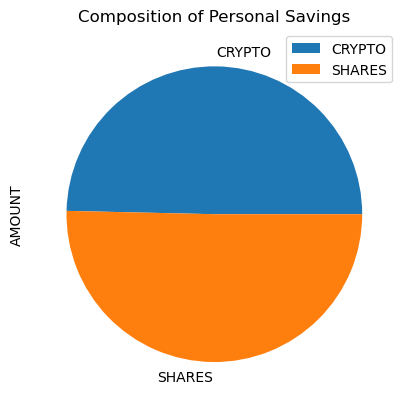

In [71]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y='AMOUNT', title='Composition of Personal Savings')

In [72]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund
# Calculate total amount of savings
# YOUR CODE HERE!
total_securities_holdings = round(my_spy_value + my_agg_value + my_btc_value + my_eth_value,2)
total_securities_holdings
   

# Validate saving health
# YOUR CODE HERE!
if total_securities_holdings == emergency_fund:
    print(f"Congratulations! You've reached your financial goal.")     
elif total_securities_holdings < emergency_fund:
    difference = emergency_fund - total_securities_holdings
    print(f"You are short of your financial goal by ${difference}")
elif total_securities_holdings > emergency_fund:
    print(f'Congratulations! You have enough money in your emergency fund.')
     
                

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-06-17', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-16', tz='America/New_York').isoformat()

In [73]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
timeframe = "1Day"
tickers = ["AGG","SPY"]
df_agg_spy_port = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_agg_spy_port[df_agg_spy_port['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_agg_spy_port[df_agg_spy_port['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()
df_stock_data.tail()

AGG                                               \
                            open    high      low  close   volume trade_count   
timestamp                                                                       
2023-06-12 04:00:00+00:00  98.09  98.160  97.7300  98.14  5436273       24139   
2023-06-13 04:00:00+00:00  98.48  98.480  97.6001  97.68  9568596       27973   
2023-06-14 04:00:00+00:00  97.88  97.990  97.4499  97.77  8360159       36242   
2023-06-15 04:00:00+00:00  98.29  98.460  98.1337  98.45  7471994       29262   
2023-06-16 04:00:00+00:00  98.09  98.275  97.9050  98.14  4599777       26718   

                                         SPY                            \
                                vwap    open      high     low   close   
timestamp                                                                
2023-06-12 04:00:00+00:00  97.959299  430.92  433.8800  430.17  433.80   
2023-06-13 04:00:00+00:00  97.819261  435.32  437.3300  434.63  436.66   
2023-06-14 04:00:00+00:00  97.793308  437.01  439.0612  433.59  437.18   
2023-06-15 04:00:00+00:00  98.355119  436.33  443.9000  436.23  442.60   
2023-06-16 04:00:00+00:00  98.118495  443.02  443.6078  438.97  439.46   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-06-12 04:00:00+00:00   76272808      523670  431.957032  
2023-06-13 04:00:00+00:00   95912772      673273  436.003879  
2023-06-14 04:00:00+00:00  100625477      712664  436.725442  
2023-06-15 04:00:00+00:00  110301302      748180  440.705812  
2023-06-16 04:00:00+00:00  110461387      619074  440.999282

In [74]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [75]:
# Printing the simulation input data
# YOUR CODE HERE!

MC_thirtyyear.portfolio_data.head()


AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   
2018-06-22 04:00:00+00:00  105.82  105.9400  105.80  105.940  1957177   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-06-18 04:00:00+00:00       10590  105.864382          NaN  275.49   
2018-06-19 04:00:00+00:00       10342  106.041881     0.001039  274.00   
2018-06-20 04:00:00+00:00        9220  105.886127    -0.001934  276.26   
2018-06-21 04:00:00+00:00       11286  105.870603     0.000331  275.96   
2018-06-22 04:00:00+00:00        7830  105.897826     0.000945  275.66   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2018-06-18 04:00:00+00:00  276.700  274.95  276.59  53163695      221103   
2018-06-19 04:00:00+00:00  275.750  273.53  275.48  97669710      337433   
2018-06-20 04:00:00+00:00  276.720  275.59  276.01  54051558      212283   
2018-06-21 04:00:00+00:00  275.980  273.68  274.24  75659252      289344   
2018-06-22 04:00:00+00:00  275.785  274.49  274.76  58532014      231536   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-18 04:00:00+00:00  276.151288          NaN  
2018-06-19 04:00:00+00:00  274.931757    -0.004013  
2018-06-20 04:00:00+00:00  276.065730     0.001924  
2018-06-21 04:00:00+00:00  274.618337    -0.006413  
2018-06-22 04:00:00+00:00  275.099940     0.001896

In [76]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 110.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 120.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 130.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 140.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 150.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 160.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 170.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 180.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 190.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 200.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 210.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 220.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 230.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 240.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 250.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 260.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 270.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 280.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 290.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 300.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 310.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 320.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 330.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 340.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 350.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 360.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 370.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 380.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 390.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 400.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 410.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 420.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 430.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 440.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 450.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 460.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 470.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 480.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 490.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993923,0.990240,1.010147,0.997314,0.990658,0.997374,0.998884,0.985896,1.008031,1.005224,...,1.005155,1.013646,0.999221,1.000200,0.994837,0.993601,1.009280,1.008060,1.006482,0.998009
2,0.986601,0.994870,0.998872,1.006234,0.988925,1.002037,0.998132,0.992033,1.012968,1.006513,...,1.011228,1.020419,1.008156,1.007784,0.996471,0.994540,1.010935,1.010213,0.989009,0.989946
3,0.988075,1.013269,0.993585,1.016810,0.981021,1.009673,0.990940,0.994154,1.022273,1.003650,...,1.016037,1.009791,0.999357,1.001950,0.993617,0.996579,1.023875,1.003096,0.989639,0.978523
4,0.981099,1.020349,0.990196,1.025020,0.970543,1.015597,1.001582,0.994325,1.016524,1.002832,...,1.018513,1.010414,0.998142,0.997182,1.000898,0.993360,1.024049,1.016712,0.988294,0.991709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.327997,6.468609,19.378852,17.677605,10.947130,2.878106,6.273769,8.989375,2.848143,2.707187,...,3.135594,2.591262,5.589199,4.423632,2.827074,16.532179,1.529444,4.523642,3.402582,1.726359
7557,3.301032,6.402602,19.343024,18.012981,10.954478,2.831142,6.206625,8.847509,2.829422,2.675708,...,3.148663,2.575475,5.621341,4.416006,2.843005,16.443919,1.524390,4.483770,3.430846,1.729100
7558,3.288683,6.409602,19.139854,18.100245,10.772350,2.840242,6.163716,8.805495,2.876675,2.688597,...,3.163802,2.575957,5.669358,4.381290,2.841111,16.566087,1.517708,4.510307,3.401745,1.690907
7559,3.290837,6.448174,18.924177,17.903674,10.976271,2.839714,6.159185,8.697448,2.916918,2.699858,...,3.143753,2.556488,5.690131,4.359178,2.851552,16.956239,1.533041,4.521212,3.377687,1.707967


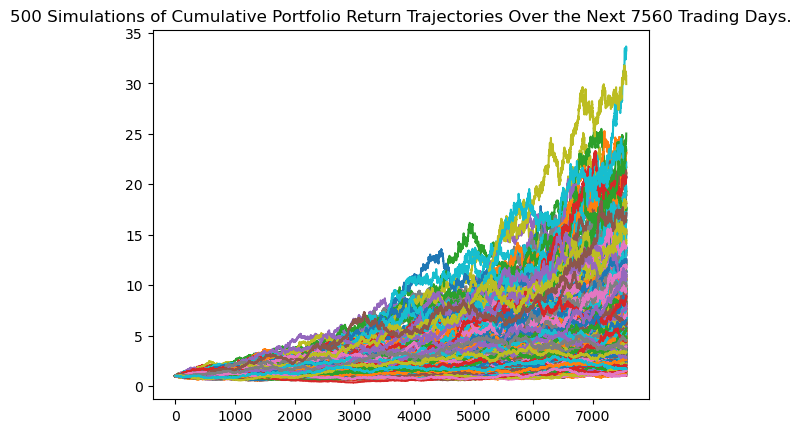

In [77]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_thirtyyear.plot_simulation()

# I'm saving the plot for future usage in readme.md file
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")


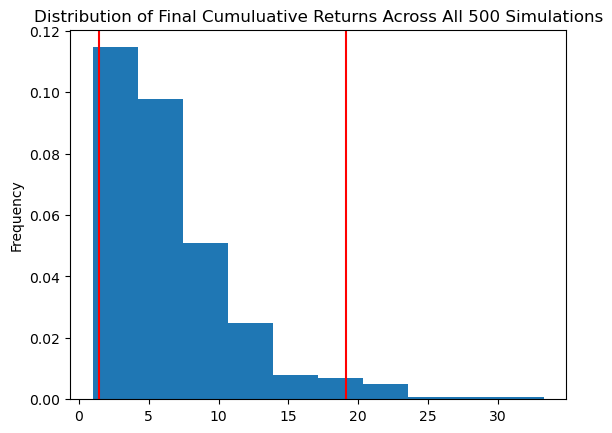

In [78]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_thirtyyear.plot_distribution()

# I'm saving the plot for readme.md file
line_plot.get_figure().savefig("MC_thirtyyear_distr_plot.png", bbox_inches="tight")

### Retirement Analysis

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(tbl)


count           500.000000
mean              6.628616
std               4.640541
min               0.994516
25%               3.331156
50%               5.398249
75%               8.613380
max              33.274754
95% CI Lower      1.435165
95% CI Upper     19.101070
Name: 7560, dtype: float64


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [80]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $28703.31 and $382021.4


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [81]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $43054.96 and $573032.09


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [82]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
# Conservative Risk-Adverse Approach with 5-years of work remaining 
# Allocation of 80% bonds (AGG), 20% stocks (SPY)

MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [83]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 110.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 120.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 130.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 140.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 150.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 160.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 170.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 180.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 190.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 200.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 210.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 220.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 230.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 240.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 250.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 260.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 270.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 280.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 290.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 300.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 310.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 320.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 330.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 340.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 350.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 360.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 370.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 380.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 390.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 400.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 410.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 420.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 430.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 440.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 450.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 460.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 470.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 480.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 490.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005662,1.005971,1.004017,0.999654,0.997560,1.003794,1.007182,1.010004,0.991654,1.003007,...,0.997114,1.000519,1.002888,0.992975,0.992356,1.004637,0.999264,0.995113,1.001023,1.001624
2,1.010404,1.010624,0.998707,1.000914,1.001729,1.004381,1.006900,1.010859,0.982116,1.004445,...,0.993079,0.993847,1.008008,0.992215,0.987407,1.004051,1.003693,0.990225,1.003093,0.998852
3,1.008663,1.017524,0.998690,0.998978,0.998024,1.006957,1.012432,1.011618,0.981349,1.003079,...,0.993104,0.988671,1.006782,0.989070,0.990395,1.006625,0.996461,0.982134,1.008911,0.998719
4,1.011385,1.020736,0.999244,1.000095,1.001480,1.003318,1.007192,1.009493,0.973969,1.008339,...,0.992559,0.982697,1.009414,0.989257,0.989481,1.010078,0.990810,0.986824,1.009061,1.002858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.462389,1.214277,0.817392,1.256112,1.752482,1.556939,1.050129,1.807163,1.514353,1.466095,...,1.371710,1.147735,1.205515,1.283051,1.335971,1.643319,1.630521,2.270172,1.294080,0.883294
7557,1.461391,1.214731,0.819783,1.252311,1.755351,1.562364,1.051085,1.809609,1.513670,1.454559,...,1.363431,1.138698,1.202910,1.282293,1.323612,1.652384,1.631183,2.275117,1.287387,0.879484
7558,1.463800,1.214174,0.813415,1.262646,1.758348,1.561986,1.054057,1.821384,1.516705,1.462521,...,1.373203,1.135128,1.206799,1.285414,1.324370,1.658290,1.635746,2.290657,1.282823,0.882338
7559,1.454767,1.210265,0.813246,1.261469,1.764602,1.562612,1.056095,1.825097,1.512338,1.458780,...,1.376450,1.126519,1.210075,1.288637,1.320406,1.658739,1.644093,2.277671,1.282003,0.876941


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 110.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 120.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 130.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 140.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 150.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 160.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 170.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 180.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 190.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 200.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 210.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 220.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 230.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 240.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 250.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 260.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 270.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 280.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 290.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 300.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 310.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 320.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 330.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 340.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 350.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 360.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 370.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 380.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 390.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 400.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 410.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 420.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 430.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 440.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 450.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 460.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 470.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 480.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 490.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

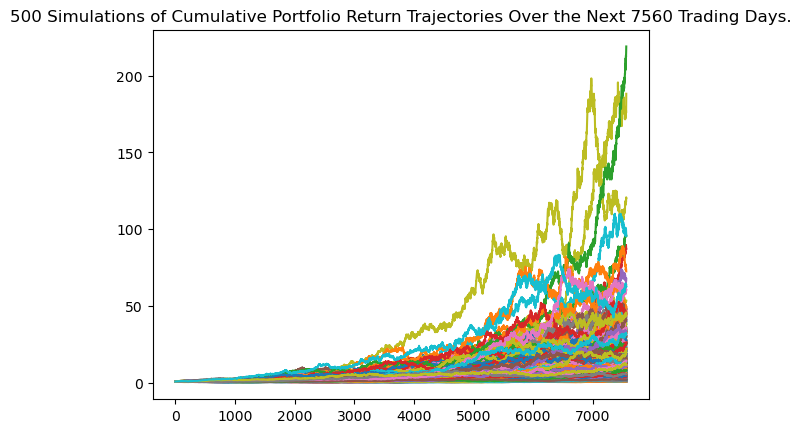

In [52]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot_five = MC_fiveyear.plot_simulation()

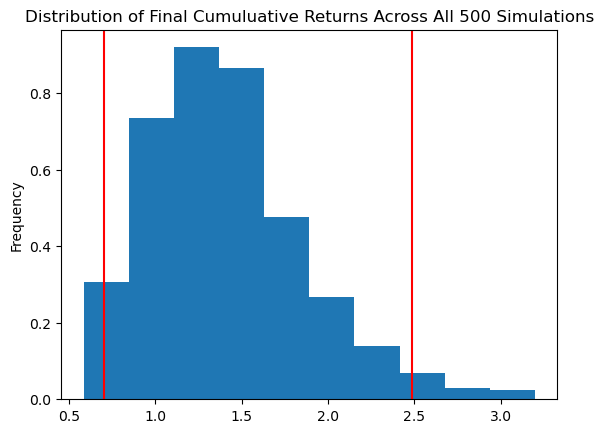

In [84]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot_five = MC_fiveyear.plot_distribution()

In [85]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(tbl_five)

count           500.000000
mean              1.410609
std               0.449881
min               0.587570
25%               1.092344
50%               1.361267
75%               1.646977
max               3.198019
95% CI Lower      0.705871
95% CI Upper      2.488715
Name: 7560, dtype: float64


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [86]:
# Set initial investment
# YOUR CODE HERE!
# Five Year requires larger initial investment since retirement time horizon is shorter
five_yr_initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl_five[8]*five_yr_initial_investment,2)
ci_upper_five = round(tbl_five[9]*five_yr_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${five_yr_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $35293.53 and $124435.77


### Ten Years Retirement Option

In [48]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

# Aggressive Risk Tolerant Approach with 10-years of work remaining 
# Allocation of 20% bonds (AGG), 80% stocks (SPY)

MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [87]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 110.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 120.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 130.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 140.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 150.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 160.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 170.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 180.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 190.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 200.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 210.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 220.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 230.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 240.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 250.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 260.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 270.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 280.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 290.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 300.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 310.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 320.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 330.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 340.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 350.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 360.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 370.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 380.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 390.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 400.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 410.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 420.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 430.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 440.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 450.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 460.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 470.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 480.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

Running Monte Carlo simulation number 490.


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\chain\OneDrive\Do

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006389,1.005962,0.982179,1.002649,0.987474,0.995822,0.989119,1.009120,1.000856,1.008700,...,1.002429,0.993091,0.989921,1.003032,1.005912,0.986437,0.990281,1.002199,0.995080,1.001493
2,1.022497,1.028830,0.996636,1.008312,0.980790,1.004564,0.996148,1.005835,0.991236,1.016152,...,1.026694,0.966860,0.984716,0.995673,1.011014,0.964915,0.986456,0.986869,1.020477,1.009899
3,1.001180,1.018023,0.990350,1.005863,0.974966,1.002938,0.985634,1.011337,0.984559,1.001553,...,1.028487,0.969109,0.983363,1.002020,1.011946,0.962013,0.996776,0.984647,1.023130,1.004982
4,1.000920,1.025890,0.997796,1.008542,0.985452,1.002312,1.000283,1.018837,0.994801,1.015228,...,1.016431,0.963151,0.967085,1.003248,1.008047,0.941134,0.999078,1.000414,1.018064,1.015702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.946908,26.904271,3.021884,16.003993,9.437013,48.240712,9.962943,2.425653,5.452845,8.204983,...,18.830880,8.135944,3.783432,40.309279,4.334943,8.876940,6.437404,5.376288,26.809084,23.391378
7557,11.989740,26.814516,2.981116,16.066279,9.588512,48.401046,10.113474,2.469501,5.447849,8.252632,...,18.959735,8.102514,3.751755,39.299675,4.312592,8.825575,6.520234,5.332919,26.652981,23.103472
7558,11.801514,26.982889,2.968803,16.235197,9.434650,48.175202,10.173243,2.485610,5.424787,8.234673,...,19.209634,8.074343,3.724006,39.569807,4.312308,8.967352,6.513908,5.447370,26.288129,22.784159
7559,12.014724,26.844190,2.937275,16.105733,9.506871,48.728903,10.178243,2.494591,5.435669,8.199312,...,19.120165,8.042218,3.699695,39.990104,4.307600,9.154731,6.609269,5.534175,25.951442,22.811050


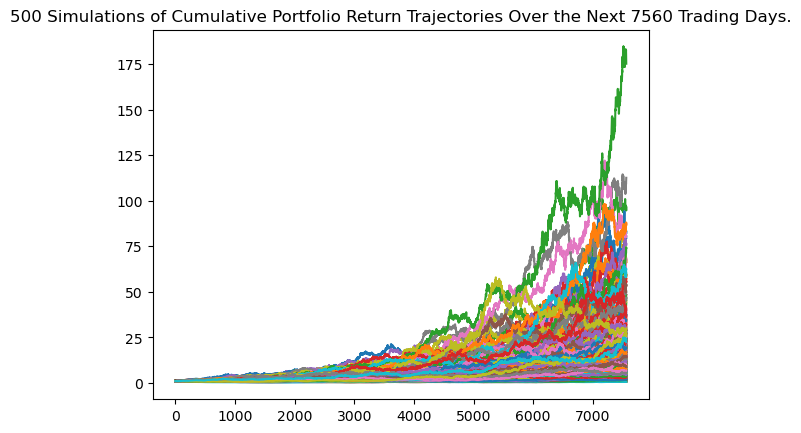

In [88]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot_ten = MC_tenyear.plot_simulation()

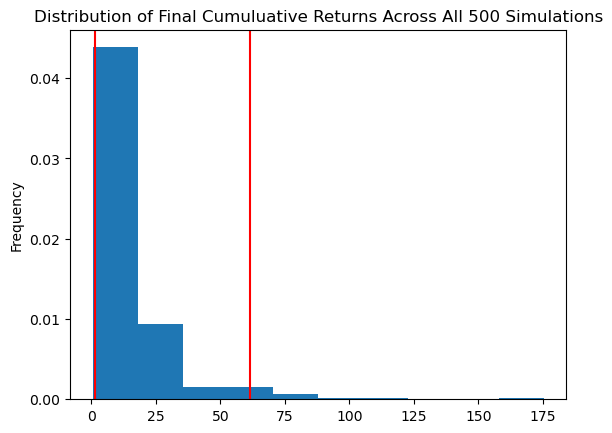

In [89]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot_ten = MC_tenyear.plot_distribution()

In [90]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(tbl_ten)


count           500.000000
mean             14.667031
std              16.715992
min               0.547826
25%               5.098786
50%               9.840908
75%              17.646136
max             175.302853
95% CI Lower      1.397700
95% CI Upper     61.512046
Name: 7560, dtype: float64


C:\Users\chain\OneDrive\Documents\FinTech BootCamp\Homework\APIs_Module_5\APIs_HW_Module_5\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [91]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 25000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $25000 in the portfolio over the next 10 years will end within in the range of $34942.5 and $1537801.15
